### FindMarkers on TLS

Main Figure 2 and corresponding supplemental figures are generated

Author: Pierre Isnard, Dian Li, Haojia Wu

Contact: dianli@wustl.edu

Last updated: December 6, 2023

In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(reshape2)
library(EnhancedVolcano)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 


Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked 

In [2]:
plots_path_main = "../../plots/version_1/main_figures"
plots_path_supp = "../../plots/version_1/supp_figures"
processed_data_path = "../../processed_data/version_1/FindMarkers"

dir.create(plots_path_main, showWarnings = F, recursive = T)
dir.create(plots_path_supp, showWarnings = F, recursive = T)
dir.create(processed_data_path, showWarnings = F, recursive = T)

### Step 1. Load dkd1 Seurat object generated from Figure 1

In [3]:
load("../../processed_data/version_1/dkd1_umap.RData")

In [4]:
load("../../meta/meta_info.RData")

### Step 2. FindMarker for TLS cluster

In [5]:
Idents(dkd1) <- dkd1$Morph.based

In [6]:
TLS.markers <- FindMarkers(dkd1, ident.1 = c("TLS"), ident.2 = NULL, min.pct = 0.1, return.thresh = 0.05)

In [7]:
dim(TLS.markers)
head(TLS.markers)

[1] 6678    5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CLEC17A,6.621847e-59,0.6250859,0.556,0.009,1.194978e-54
CCL22,1.622255e-58,1.3672820,1.000,0.031,2.927522e-54
CXCL13,1.917360e-50,4.0677342,1.000,0.039,3.460067e-46
PAX5,8.218749e-40,2.2003736,1.000,0.051,1.483155e-35
C12orf42,9.526004e-40,0.7999166,0.667,0.020,1.719063e-35
SPIB,1.339255e-39,2.0999515,1.000,0.050,2.416819e-35


In [8]:
write.csv(TLS.markers, file = file.path(processed_data_path, "TLSMarkers.csv"))

### Step 3. Generate Volcano Plot

In [9]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

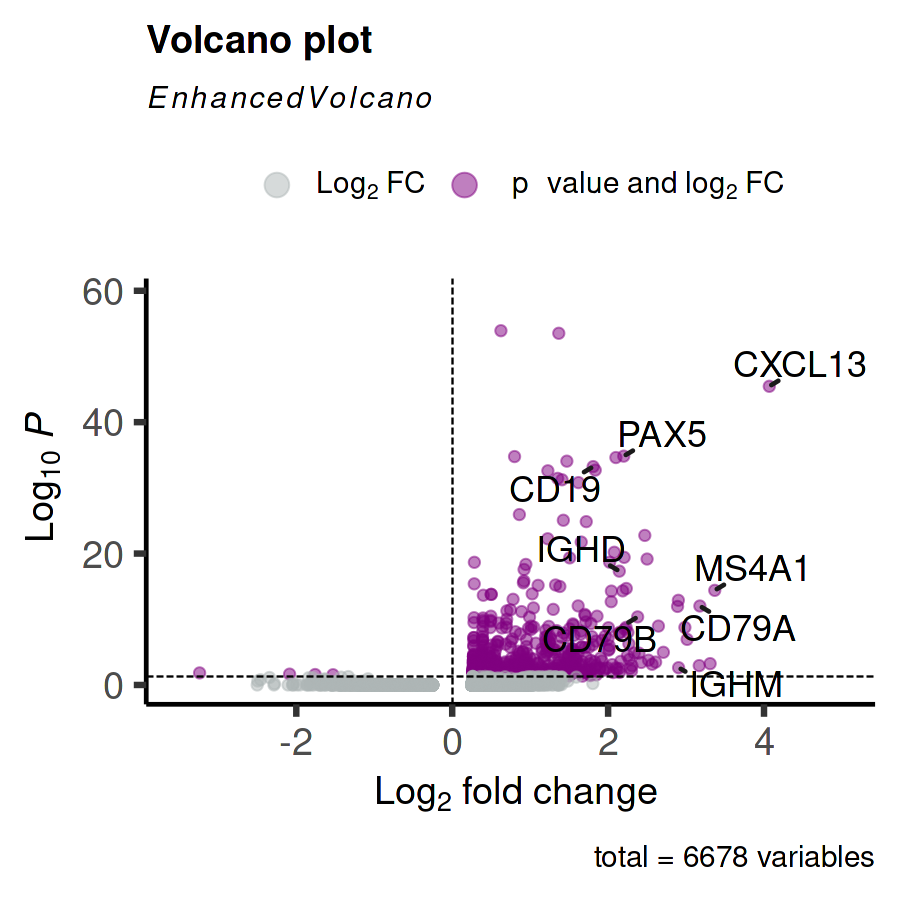

In [11]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 150)

my_select = c('CD79A', 'CD79B', 'PAX5', 'MS4A1', 'CXCL13', 'IGHM', 'IGHD', 'CD19')

p = EnhancedVolcano(TLS.markers,
                    rownames(TLS.markers),
                    selectLab = my_select,
                    drawConnectors = TRUE,
                    arrowheads = FALSE,
                    widthConnectors = 0.8,
                    x ="avg_log2FC",
                    y ="p_val_adj",
                    xlim = c(-3.5, 5),
                    pCutoff = 0.05,
                    FCcutoff = 0,      #  to not show the X axes,
                    gridlines.major = FALSE,
                    gridlines.minor = FALSE,
                    col=c('#ADB6B6', '#ADB6B6', '#ADB6B6', as.character(color_palette["TLS"])),
                    labSize = 6
)
p = p + custom_theme
p

ggsave(file.path(plots_path_main, "VolcanoPlot_FindMarkers_TLS.png"), plot = p, width = 8, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "VolcanoPlot_FindMarkers_TLS.pdf"), plot = p, width = 8, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "VolcanoPlot_FindMarkers_TLS.svg"), plot = p, width = 8, height = 8, units = "in", dpi = 300)

TLS 
"#800080"

### Step 4. Generate Feature plot on UMAP

In [44]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

empty_theme = theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank())

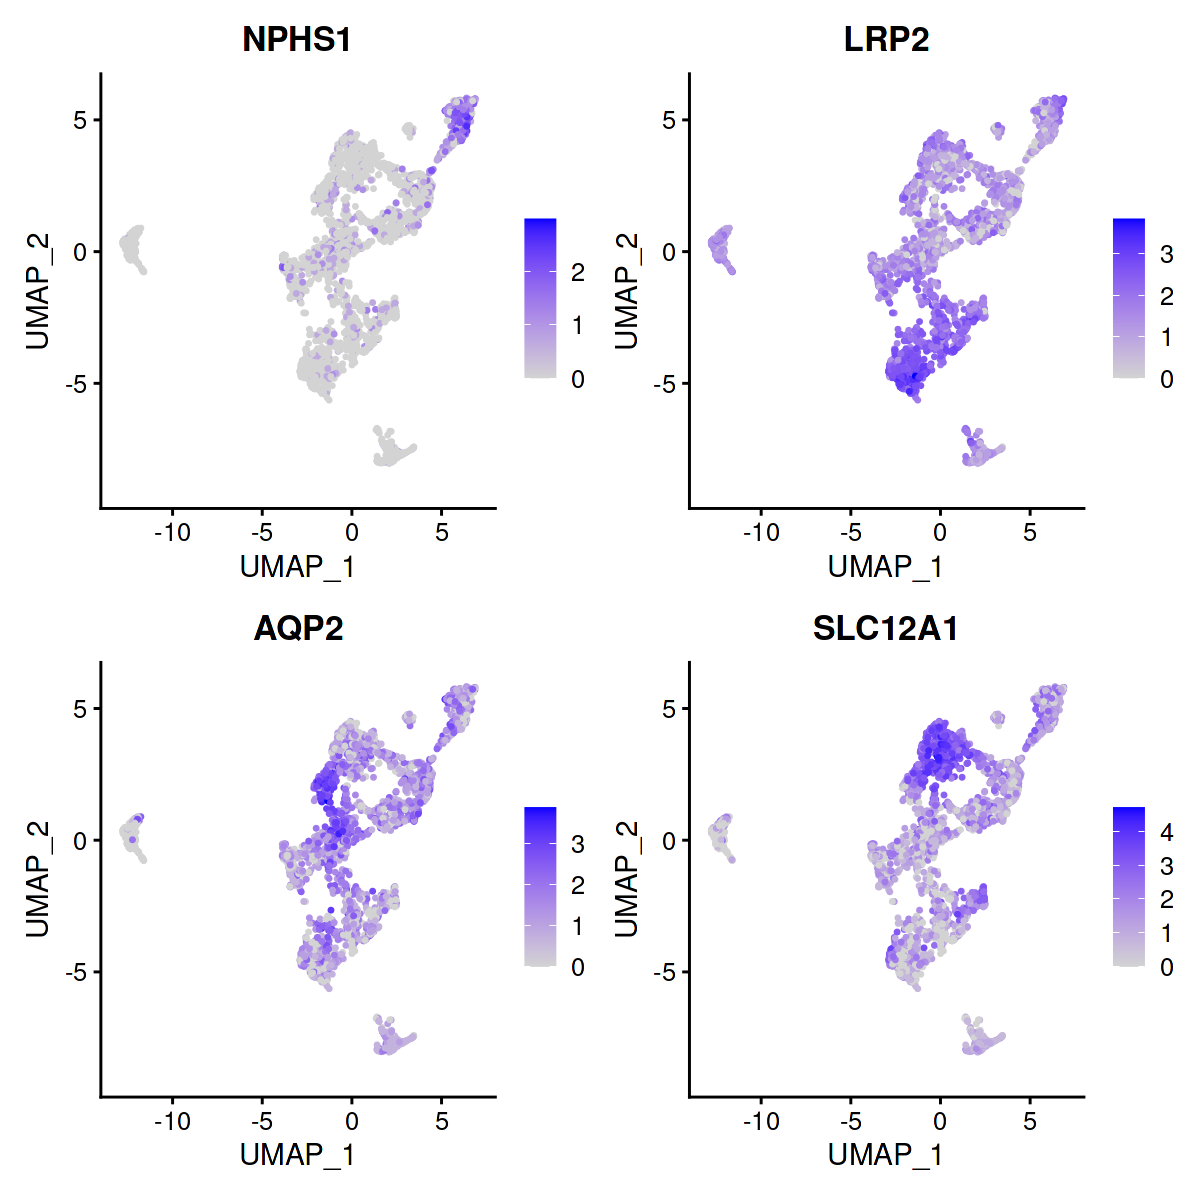

In [51]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 150)
feature_list = c("NPHS1", "LRP2","AQP2", "SLC12A1")
p = FeaturePlot(dkd1, feature = feature_list)

p

In [53]:
for (feature_single in feature_list){
    p <- FeaturePlot(dkd1, feature = feature_single) + 
#    guides(fill = guide_legend(override.aes = list(size=6), title="nCount_Spatial") ) +
    custom_theme + 
    empty_theme
    
    ggsave(p, filename = file.path(plots_path_supp, paste0("FeaturePlot_",feature_single,".png")), width = 6, height = 5, units = "in", dpi = 300)
    ggsave(p, filename = file.path(plots_path_supp, paste0("FeaturePlot_",feature_single,".pdf")), width = 6, height = 5, units = "in", dpi = 300)
    ggsave(p, filename = file.path(plots_path_supp, paste0("FeaturePlot_",feature_single,".svg")), width = 6, height = 5, units = "in", dpi = 300)
 
}

In [28]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] EnhancedVolcano_1.16.0 ggrepel_0.9.4          reshape2_1.4.4        
[4] ggplot2_3.4.4          dplyr_1.1.3            sp_2.0-0              
[7] SeuratObject_4.1.0     Seurat_4.1.1          

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            